In [12]:
import feature_creator as fc
import pandas as pd
import xgboost as xgb
from xgboost.sklearn import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,cross_val_score
from sklearn.base import clone
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import numpy as np
from copy import copy

## Get data

In [13]:
df = pd.read_csv('spect_train.csv')
X = df.drop(columns=['OVERALL_DIAGNOSIS']).to_numpy()
y = df['OVERALL_DIAGNOSIS'].to_numpy()
print(X.shape)
print(y.shape)

(80, 44)
(80,)


## Define Classifiers

In [14]:
model =  XGBClassifier()
feature_model = DecisionTreeRegressor(max_depth=5)

In [15]:
#Baseline
scores = cross_val_score(model, X, y, cv=10, scoring='f1')
np.mean(scores)

0.7688888888888888

## Run Feature Creator

In [16]:
feature_models, ga_fitness = fc.feature_creator(model,feature_model,X,y,n_features=2,batch_size=0.5)

## Results

In [17]:
import matplotlib.pyplot as plt

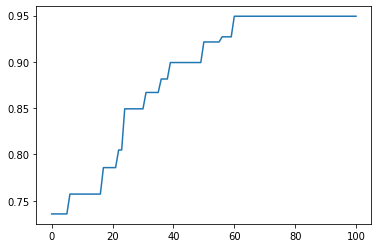

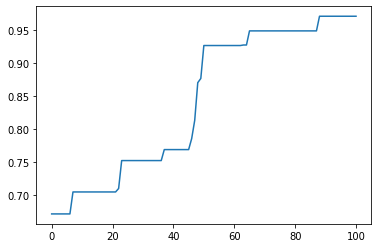

In [18]:
for data in ga_fitness:
    plt.plot(data)
    plt.show()

In [19]:
new_X = copy(X)
for f in feature_models:
    new_X = np.hstack((new_X,np.array([fc.get_feature_values(f,X)]).T))

In [20]:
print(new_X.shape)

(80, 46)


In [21]:
model =  XGBClassifier()
scores = cross_val_score(model, X, y, cv=10, scoring='f1')
print(f'{np.mean(scores)}+-{np.std(scores)}')

0.7688888888888888+-0.20176994600562076


In [22]:
model =  XGBClassifier()
scores = cross_val_score(model, new_X, y, cv=10, scoring='f1')
print(f'{np.mean(scores)}+-{np.std(scores)}')

0.884920634920635+-0.08859076991984652
